<h4><b>Dataset name / short description:</b></h4>
Name is "Astronauts CSV File". This database contains publically available information about all astronauts who participated in space missions before 15 January 2020.

<h4><b>Data source (url):</b></h4>
https://think.cs.vt.edu/corgis/csv/astronauts/

<h4><b>Data format:</b></h4>
csv file

<h4><b>Aim to answer the following question:</b></h4>
 Who had more chances to become a greater astronaut?
 Answer for this question in the end of the notebook
 
Tuomas, I am not sure that I have done this analytics correctly. I am so lost. It is kinda difficult to analyze data without understanding what exactly should be analyzed

In [82]:
# import modules
# numpy and pandas for downloading and analyzing
# seaborn and matplotlib for plots and chars
# dtale for open df in the browser for analyzing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dtale

In [83]:
# download and read the data
df = pd.read_csv('astronauts.csv')
df

,Profile.Astronaut Numbers.Overall,Profile.Astronaut Numbers.Nationwide,Profile.Name,Profile.Gender,Profile.Birth Year,Profile.Nationality,Profile.Military,Profile.Selection.Group,Profile.Selection.Year,Profile.Lifetime Statistics.Mission count,Mission.Role,Mission.Year,Mission.Name,Mission.Vechicles.Ascent,Mission.Vechicles.Orbit,Mission.Vechicles.Decent,Mission.Durations.Mission duration,Profile.Lifetime Statistics.Mission duration,Mission.Durations.EVA duration,Profile.Lifetime Statistics.EVA duration
0,1,1,"Gagarin, Yuri",male,1934,U.S.S.R/Russia,True,TsPK-1,1960,1,pilot,1961,Vostok 1,Vostok 1,Vostok 2,Vostok 3,1.77,1.77,0.00,0.00
1,2,2,"Titov, Gherman",male,1935,U.S.S.R/Russia,True,TsPK-1,1960,1,pilot,1961,Vostok 2,Vostok 2,Vostok 2,Vostok 2,25.00,25.30,0.00,0.00
2,3,1,"Glenn, John H., Jr.",male,1921,U.S.,True,NASA Astronaut Group 1,1959,2,pilot,1962,MA-6,MA-6,MA-6,MA-6,5.00,218.00,0.00,0.00
3,3,1,"Glenn, John H., Jr.",male,1921,U.S.,True,NASA Astronaut Group 2,1959,2,PSP,1998,STS-95,STS-95,STS-95,STS-95,213.00,218.00,0.00,0.00
4,4,2,"Carpenter, M. Scott",male,1925,U.S.,True,NASA- 1,1959,1,Pilot,1962,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,5.00,5.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,561,345,"McClain, Anne Charlotte",female,1979,U.S.,True,NASA-21,2013,1,flight engineer,2018,57,Soyuz MS-11,ISS,Soyuz MS-11,4887.00,4887.00,13.13,13.13
1266,562,346,"Koch, Christina",female,1979,U.S.,True,NASA-21,2013,1,flight engineer,2019,59,Soyuz MS-12,ISS,not completed yet,7372.30,7372.30,27.80,27.80
1267,563,347,"Morgan, Andrew",male,1976,U.S.,True,NASA-21,2013,1,flight engineer,2019,60,Soyuz MS-13,ISS,not completed yet,4303.08,4303.08,39.52,39.52
1268,564,348,"Meir, Jessica",female,1977,U.S.,True,NASA-21,2013,1,flight engineer,2019,60,Soyuz MS-15,ISS,not completed yet,2697.60,2697.60,7.28,7.28


In [84]:
# see what columns we have
df.columns

Index(['Profile.Astronaut Numbers.Overall',
       'Profile.Astronaut Numbers.Nationwide', 'Profile.Name',
       'Profile.Gender', 'Profile.Birth Year', 'Profile.Nationality',
       'Profile.Military', 'Profile.Selection.Group', 'Profile.Selection.Year',
       'Profile.Lifetime Statistics.Mission count', 'Mission.Role',
       'Mission.Year', 'Mission.Name', 'Mission.Vechicles.Ascent',
       'Mission.Vechicles.Orbit', 'Mission.Vechicles.Decent',
       'Mission.Durations.Mission duration',
       'Profile.Lifetime Statistics.Mission duration',
       'Mission.Durations.EVA duration',
       'Profile.Lifetime Statistics.EVA duration'],
      dtype='object')

In [85]:
# we can delete columns which are unusefull
# these columns do not affect on analysis
df = df.drop('Profile.Astronaut Numbers.Nationwide', axis = 1)
df = df.drop('Mission.Vechicles.Ascent', axis = 1)
df = df.drop("Mission.Vechicles.Orbit", axis = 1)
df = df.drop('Mission.Vechicles.Decent', axis = 1)

In [86]:
# we need to rename columns
# I wrote in 4 command lines instead of one
# because it was more convient for typing
df = df.rename(columns={"Profile.Astronaut Numbers.Overall": "Astronaut_Number", "Profile.Name": "Name", "Profile.Gender": "Gender", "Profile.Birth Year": "Birth_Year"})
df = df.rename(columns={"Profile.Nationality": "Nationality", "Profile.Military": "Military", "Profile.Selection.Group": "Selection_Group", "Profile.Selection.Year": "Selection_Year"})
df = df.rename(columns={"Profile.Lifetime Statistics.Mission count": "Mission_count", "Mission.Name": "Mission_Name", "Mission.Role": "Mission_Role", "Mission.Year": "Mission_Year"})
df = df.rename(columns={"Mission.Durations.Mission duration": "Mission_Duration", "Profile.Lifetime Statistics.Mission duration": "Lifetime_Mission_Duration", "Mission.Durations.EVA duration": "Mission_EVA_Duration", "Profile.Lifetime Statistics.EVA duration": "Lifetime_EVA_Duration"})
df

,Astronaut_Number,Name,Gender,Birth_Year,Nationality,Military,Selection_Group,Selection_Year,Mission_count,Mission_Role,Mission_Year,Mission_Name,Mission_Duration,Lifetime_Mission_Duration,Mission_EVA_Duration,Lifetime_EVA_Duration
0,1,"Gagarin, Yuri",male,1934,U.S.S.R/Russia,True,TsPK-1,1960,1,pilot,1961,Vostok 1,1.77,1.77,0.00,0.00
1,2,"Titov, Gherman",male,1935,U.S.S.R/Russia,True,TsPK-1,1960,1,pilot,1961,Vostok 2,25.00,25.30,0.00,0.00
2,3,"Glenn, John H., Jr.",male,1921,U.S.,True,NASA Astronaut Group 1,1959,2,pilot,1962,MA-6,5.00,218.00,0.00,0.00
3,3,"Glenn, John H., Jr.",male,1921,U.S.,True,NASA Astronaut Group 2,1959,2,PSP,1998,STS-95,213.00,218.00,0.00,0.00
4,4,"Carpenter, M. Scott",male,1925,U.S.,True,NASA- 1,1959,1,Pilot,1962,Mercury-Atlas 7,5.00,5.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,561,"McClain, Anne Charlotte",female,1979,U.S.,True,NASA-21,2013,1,flight engineer,2018,57,4887.00,4887.00,13.13,13.13
1266,562,"Koch, Christina",female,1979,U.S.,True,NASA-21,2013,1,flight engineer,2019,59,7372.30,7372.30,27.80,27.80
1267,563,"Morgan, Andrew",male,1976,U.S.,True,NASA-21,2013,1,flight engineer,2019,60,4303.08,4303.08,39.52,39.52
1268,564,"Meir, Jessica",female,1977,U.S.,True,NASA-21,2013,1,flight engineer,2019,60,2697.60,2697.60,7.28,7.28


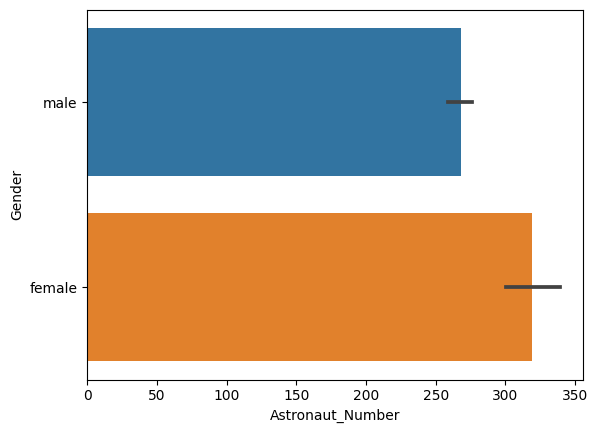

In [87]:
# let's see do we have more male or female austronats
# we can see that numbers are almost same
# it means that gender does not affect on becoming an austronaut
sns.barplot(x='Astronaut_Number',y='Gender',data=df)
plt.show()

In [88]:
# let's the most common nationalities
# we need to take into account
# that data is limited by time (1921-1983 years)
# we could see that where there are more astroanuts from U.S. and U.S.S.R
purposes = df['Nationality'].value_counts()
purposes.head(5)

U.S.              850
U.S.S.R/Russia    273
Japan              20
France             18
Canada             18
Name: Nationality, dtype: int64

In [89]:
# let's find the most popular birth year of an astronaut
# we could see that there are more astroanuts
# who were born between 1949-1956 year
purposes = df['Birth_Year'].value_counts()
purposes.head(10)

1956    78
1958    59
1957    55
1951    55
1952    54
1949    51
1961    41
1964    41
1959    40
1955    40
Name: Birth_Year, dtype: int64

In [90]:
# let's see were these people in Military or not
# Does Military affect on selection?
# We can True & False to replace by 1&0
# in order to check correlations
# there is no correalation between Birth_year and Military
df["Military"] = df["Military"].astype(int)
df['Birth_Year'].corr(df['Military'])

nan

<AxesSubplot: xlabel='Mission_count', ylabel='Selection_Year'>

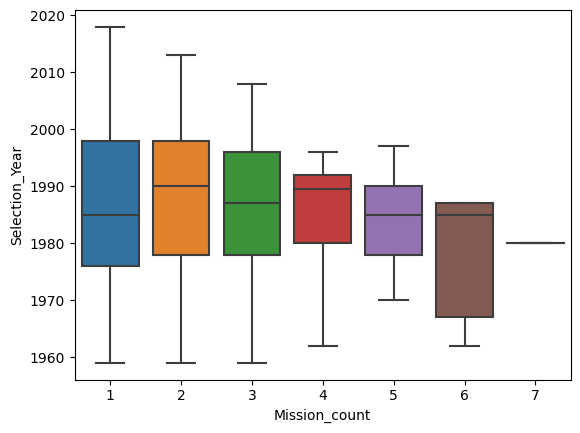

In [91]:
# We can see that people who started their career in ≈1970 year
# they had more missions
# more missions -> greater astronaut
sns.boxplot(x='Mission_count', y='Selection_Year', data=df)

In [92]:
# let's see do we have any correlations between Mission_Role and becoming an astronaut
# Do some roles get easier?
# Below we could 4 most popular 
Mission_Role = df['Mission_Role'].value_counts()
Mission_Role.head(10)

MSP                      498
commander                315
pilot                    195
flight engineer          191
PSP                       59
Flight engineer            4
Other (Space tourist)      3
Other (space tourist)      2
Pilot                      1
Other (Journalist)         1
Name: Mission_Role, dtype: int64

In [93]:
# We can see that the signifiant amount
# of astronauts have 1-4 missions
number_mission_count = df['Mission_count'].value_counts()
number_mission_count.head(10)

2    319
3    300
4    272
1    198
5    125
6     42
7     14
Name: Mission_count, dtype: int64

In [94]:
# Do we have any correlation between Mission_count and Selection_Year?
# Do people who were selected in the specific year, had more missions?
# No, there is no correlation
df['Selection_Year'].corr(df['Mission_count'])

-0.09476910020687912

<AxesSubplot: xlabel='Mission_count', ylabel='Nationality'>

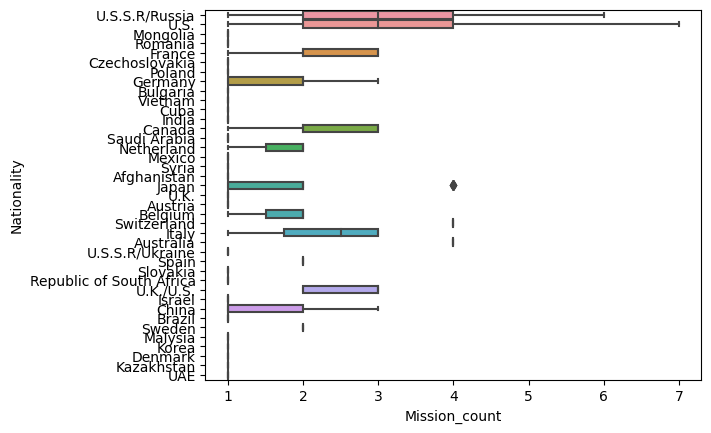

In [95]:
# Do we have correlations between Mission count and Nationality?
# Yes, in U.S.S.R and U.S. there more mission at those time
# It means, that if a person were U.S. or U.S.S.R citizen, they 
# had more chances to become a greater astronauts
sns.boxplot(x='Mission_count', y='Nationality', data=df)

In [96]:
# Do we have popular Mission_Name?
# Is it possible that one mission needeed more astronauts?
# Numbers are small, there is no mission that needed 100 or more astronauts
# There is no correlation between Mission and a chance to be selected
number_mission_count = df['Mission_Name'].value_counts()
number_mission_count.head(20)

Salyut 7    24
Salyut 6    14
2            9
24           9
20           8
3            8
STS-42       8
STS-118      7
STS-41-G     7
23           7
STS-92       7
STS-82       7
STS-78       7
22           7
STS-47       7
STS-73       7
STS-58       7
STS-75       7
STS-110      7
STS-50       7
Name: Mission_Name, dtype: int64